In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

In [3]:
df = pd.read_csv('gpu_specs_v6.csv')

In [4]:
df.head()

,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
0,NVIDIA,GeForce RTX 4050,2023.0,8.0,128.0,1925,2250.0,3840.0,120,48,NaN,NaN,No,PCIe 4.0 x16,GDDR6,AD106
1,Intel,Arc A350M,2022.0,4.0,64.0,300,1500.0,768.0,48,24,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
2,Intel,Arc A370M,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
3,Intel,Arc A380,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
4,Intel,Arc A550M,2022.0,8.0,128.0,300,1500.0,2048.0,128,64,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   manufacturer   2889 non-null   object 
 1   productName    2889 non-null   object 
 2   releaseYear    2845 non-null   float64
 3   memSize        2477 non-null   float64
 4   memBusWidth    2477 non-null   float64
 5   gpuClock       2889 non-null   int64  
 6   memClock       2477 non-null   float64
 7   unifiedShader  2065 non-null   float64
 8   tmu            2889 non-null   int64  
 9   rop            2889 non-null   int64  
 10  pixelShader    824 non-null    float64
 11  vertexShader   824 non-null    float64
 12  igp            2889 non-null   object 
 13  bus            2889 non-null   object 
 14  memType        2889 non-null   object 
 15  gpuChip        2889 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 361.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
releaseYear,2845.0,2010.691388,6.193125,1986.000000,2006.000,2011.000,2015.0,2023.0
memSize,2477.0,3.113803,7.175399,0.000032,0.256,1.024,3.0,128.0
memBusWidth,2477.0,274.874445,653.163896,32.000000,128.000,128.000,256.0,8192.0
gpuClock,2889.0,661.126687,374.481450,10.000000,400.000,600.000,875.0,2331.0
memClock,2477.0,868.578119,509.987396,5.000000,400.000,837.000,1250.0,2257.0
unifiedShader,2065.0,1032.937530,1662.834618,8.000000,144.000,384.000,1280.0,17408.0
tmu,2889.0,47.429214,73.014849,0.000000,8.000,20.000,56.0,880.0
rop,2889.0,18.750087,25.067896,0.000000,4.000,8.000,24.0,256.0
pixelShader,824.0,6.739078,8.091586,0.000000,2.000,4.000,8.0,48.0
vertexShader,824.0,2.622573,2.579388,0.000000,0.000,2.000,4.0,24.0


In [7]:
df.isna().sum()

manufacturer        0
productName         0
releaseYear        44
memSize           412
memBusWidth       412
gpuClock            0
memClock          412
unifiedShader     824
tmu                 0
rop                 0
pixelShader      2065
vertexShader     2065
igp                 0
bus                 0
memType             0
gpuChip             0
dtype: int64

In [8]:
columns_to_replace = ['memSize', 'memBusWidth', 'memClock', 'unifiedShader', 'pixelShader', 'vertexShader']
for column in columns_to_replace:
    df[column] = df[column].fillna(0)

In [9]:
df.isna().sum()

manufacturer      0
productName       0
releaseYear      44
memSize           0
memBusWidth       0
gpuClock          0
memClock          0
unifiedShader     0
tmu               0
rop               0
pixelShader       0
vertexShader      0
igp               0
bus               0
memType           0
gpuChip           0
dtype: int64

In [10]:
year = 1-len(df['releaseYear'].dropna())/len(df)
print('Пропущенных значений в releaseYear: {:.1%}'.format(year))

Пропущенных значений в releaseYear: 1.5%


In [11]:
df.dropna(subset=['releaseYear'],inplace = True, axis = 0)
df.isna().sum()

manufacturer     0
productName      0
releaseYear      0
memSize          0
memBusWidth      0
gpuClock         0
memClock         0
unifiedShader    0
tmu              0
rop              0
pixelShader      0
vertexShader     0
igp              0
bus              0
memType          0
gpuChip          0
dtype: int64

In [12]:
df.columns

Index(['manufacturer', 'productName', 'releaseYear', 'memSize', 'memBusWidth',
       'gpuClock', 'memClock', 'unifiedShader', 'tmu', 'rop', 'pixelShader',
       'vertexShader', 'igp', 'bus', 'memType', 'gpuChip'],
      dtype='object')

In [13]:
df.columns = df.columns.str.lower()
df.columns

Index(['manufacturer', 'productname', 'releaseyear', 'memsize', 'membuswidth',
       'gpuclock', 'memclock', 'unifiedshader', 'tmu', 'rop', 'pixelshader',
       'vertexshader', 'igp', 'bus', 'memtype', 'gpuchip'],
      dtype='object')

In [14]:
df.duplicated().sum()

32

In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2813 entries, 0 to 2844
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   manufacturer   2813 non-null   object 
 1   productname    2813 non-null   object 
 2   releaseyear    2813 non-null   float64
 3   memsize        2813 non-null   float64
 4   membuswidth    2813 non-null   float64
 5   gpuclock       2813 non-null   int64  
 6   memclock       2813 non-null   float64
 7   unifiedshader  2813 non-null   float64
 8   tmu            2813 non-null   int64  
 9   rop            2813 non-null   int64  
 10  pixelshader    2813 non-null   float64
 11  vertexshader   2813 non-null   float64
 12  igp            2813 non-null   object 
 13  bus            2813 non-null   object 
 14  memtype        2813 non-null   object 
 15  gpuchip        2813 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 1.3 MB


In [18]:
for dtype in ['float','int','object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024
    print("Averege memory usage for {} columns: {:03.3f} KB".format(dtype, mean_usage_mb))

Averege memory usage for float columns: 21.977 KB
Averege memory usage for int columns: 21.977 KB
Averege memory usage for object columns: 154.683 KB


In [20]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # Если не DataFrame, то Series
        usage_b = pandas.memory_usage(deep = True)
    usage_mb = usage_b / 1024 # преобразование байтов в КБ
    return "{:03.3f} KB".format(usage_mb)

In [25]:
df_int = df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')

print(mem_usage(df_int))
print(mem_usage(converted_int))

compare_ints = pd.concat([df_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

87.906 KB
38.459 KB


,before,after
uint16,NaN,3.0
int64,3.0,NaN


In [26]:
df_float = df.select_dtypes(in clude=['float'])
converted_float = df_float.apply(pd.to_numeric,downcast='float')

print(mem_usage(df_float))
print(mem_usage(converted_float))

compare_floats = pd.concat([df_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

175.812 KB
98.895 KB


,before,after
float32,NaN,7.0
float64,7.0,NaN


In [27]:
optimized_df = df.copy()

optimized_df[converted_int.columns] = converted_int
optimized_df[converted_float.columns] = converted_float

print(mem_usage(df))
print(mem_usage(optimized_df))

1302.544 KB
1176.179 KB


In [28]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.describe().T

,count,unique,top,freq
manufacturer,2813,8,NVIDIA,1256
productname,2813,2541,HD Graphics,9
igp,2813,2,No,2423
bus,2813,30,PCIe 2.0 x16,552
memtype,2813,27,GDDR5,711
gpuchip,2813,470,GK104,51


In [30]:
converted_obj = pd.DataFrame()
for col in df_obj.columns:
    num_unique_values = len(df_obj[col].unique())
    num_total_values = len(df_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = df_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = df_obj[col]

In [31]:
print(mem_usage(df_obj))
print(mem_usage(converted_obj))

compare_obj = pd.concat([df_obj.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts)

1082.778 KB
292.808 KB


,before,after
object,6.0,1
category,NaN,1
category,NaN,1
category,NaN,1
category,NaN,1
category,NaN,1


In [32]:
optimized_df[converted_obj.columns] = converted_obj
mem_usage(optimized_df)

'386.208 KB'

In [33]:
df = optimized_df

In [34]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2813 entries, 0 to 2844
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   manufacturer   2813 non-null   category
 1   productname    2813 non-null   object  
 2   releaseyear    2813 non-null   float32 
 3   memsize        2813 non-null   float32 
 4   membuswidth    2813 non-null   float32 
 5   gpuclock       2813 non-null   uint16  
 6   memclock       2813 non-null   float32 
 7   unifiedshader  2813 non-null   float32 
 8   tmu            2813 non-null   uint16  
 9   rop            2813 non-null   uint16  
 10  pixelshader    2813 non-null   float32 
 11  vertexshader   2813 non-null   float32 
 12  igp            2813 non-null   category
 13  bus            2813 non-null   category
 14  memtype        2813 non-null   category
 15  gpuchip        2813 non-null   category
dtypes: category(5), float32(7), object(1), uint16(3)
memory usage: 386.2 KB


In [35]:
df.sample(10)

,manufacturer,productname,releaseyear,memsize,membuswidth,gpuclock,memclock,unifiedshader,tmu,rop,pixelshader,vertexshader,igp,bus,memtype,gpuchip
425,Intel,UHD Graphics 620,2018.0,0.000,0.0,300,0.0,192.0,24,3,0.0,0.0,Yes,Ring Bus,System Shared,Whiskey Lake GT2
2531,ATI,Mobility Radeon 9000 IGP,2003.0,0.000,0.0,300,0.0,0.0,2,2,2.0,1.0,Yes,AGP 8x,System Shared,RS300
1089,AMD,Radeon HD 8310G IGP,2013.0,0.000,0.0,424,0.0,128.0,8,4,0.0,0.0,Yes,IGP,System Shared,Scrapper Lite
2790,ATI,Rage 128 VR PCI,1998.0,0.032,64.0,80,125.0,0.0,2,2,2.0,0.0,No,PCI,DDR,Rage 4
1385,NVIDIA,GeForce GT 520 PCI,2011.0,1.024,64.0,810,900.0,48.0,8,4,0.0,0.0,No,PCI,DDR3,GF119
104,AMD,Radeon RX 6600 XT,2021.0,8.000,128.0,1968,2000.0,2048.0,128,64,0.0,0.0,No,PCIe 4.0 x8,GDDR6,Navi 23
2328,ATI,Radeon X800 GT AGP,2005.0,0.256,256.0,475,493.0,0.0,12,12,12.0,6.0,No,AGP 8x,GDDR3,R481
686,NVIDIA,GeForce GTX 960 OEM,2015.0,3.000,192.0,924,1253.0,1280.0,80,48,0.0,0.0,No,PCIe 3.0 x16,GDDR5,GM204
2240,ATI,Radeon X850 CrossFire Edition,2006.0,0.256,256.0,520,540.0,0.0,16,16,16.0,6.0,No,PCIe 1.0 x16,GDDR3,R480
996,NVIDIA,GeForce GT 745M,2013.0,2.000,128.0,549,1000.0,384.0,32,16,0.0,0.0,No,PCIe 3.0 x16,GDDR5,GK107


In [36]:
df['time_go'] = 2023 - df['releaseyear']
df.head()

,manufacturer,productname,releaseyear,memsize,membuswidth,gpuclock,memclock,unifiedshader,tmu,rop,pixelshader,vertexshader,igp,bus,memtype,gpuchip,time_go
0,NVIDIA,GeForce RTX 4050,2023.0,8.0,128.0,1925,2250.0,3840.0,120,48,0.0,0.0,No,PCIe 4.0 x16,GDDR6,AD106,0.0
1,Intel,Arc A350M,2022.0,4.0,64.0,300,1500.0,768.0,48,24,0.0,0.0,No,PCIe 4.0 x8,GDDR6,DG2-128,1.0
2,Intel,Arc A370M,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,0.0,0.0,No,PCIe 4.0 x8,GDDR6,DG2-128,1.0
3,Intel,Arc A380,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,0.0,0.0,No,PCIe 4.0 x8,GDDR6,DG2-128,1.0
4,Intel,Arc A550M,2022.0,8.0,128.0,300,1500.0,2048.0,128,64,0.0,0.0,No,PCIe 4.0 x16,GDDR6,DG2-512,1.0


Text(5.069444444444445, 0.5, 'Количество')

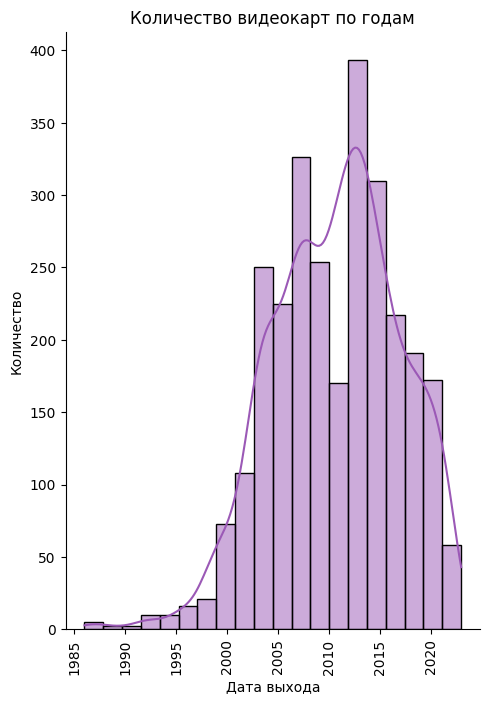

In [44]:
ax = sns.displot(data=df,x='releaseyear',color='#9b59b6',bins=20,kde=True)
ax.fig.set_figheight(7)
ax.fig.set_figwidth(5)
plt.xticks(rotation=90)
plt.title('Количество видеокарт по годам')
plt.xlabel('Дата выхода')
plt.ylabel('Количество')

array([[<AxesSubplot: xlabel='memsize', ylabel='memsize'>,
        <AxesSubplot: xlabel='membuswidth', ylabel='memsize'>],
       [<AxesSubplot: xlabel='memsize', ylabel='membuswidth'>,
        <AxesSubplot: xlabel='membuswidth', ylabel='membuswidth'>]],
      dtype=object)

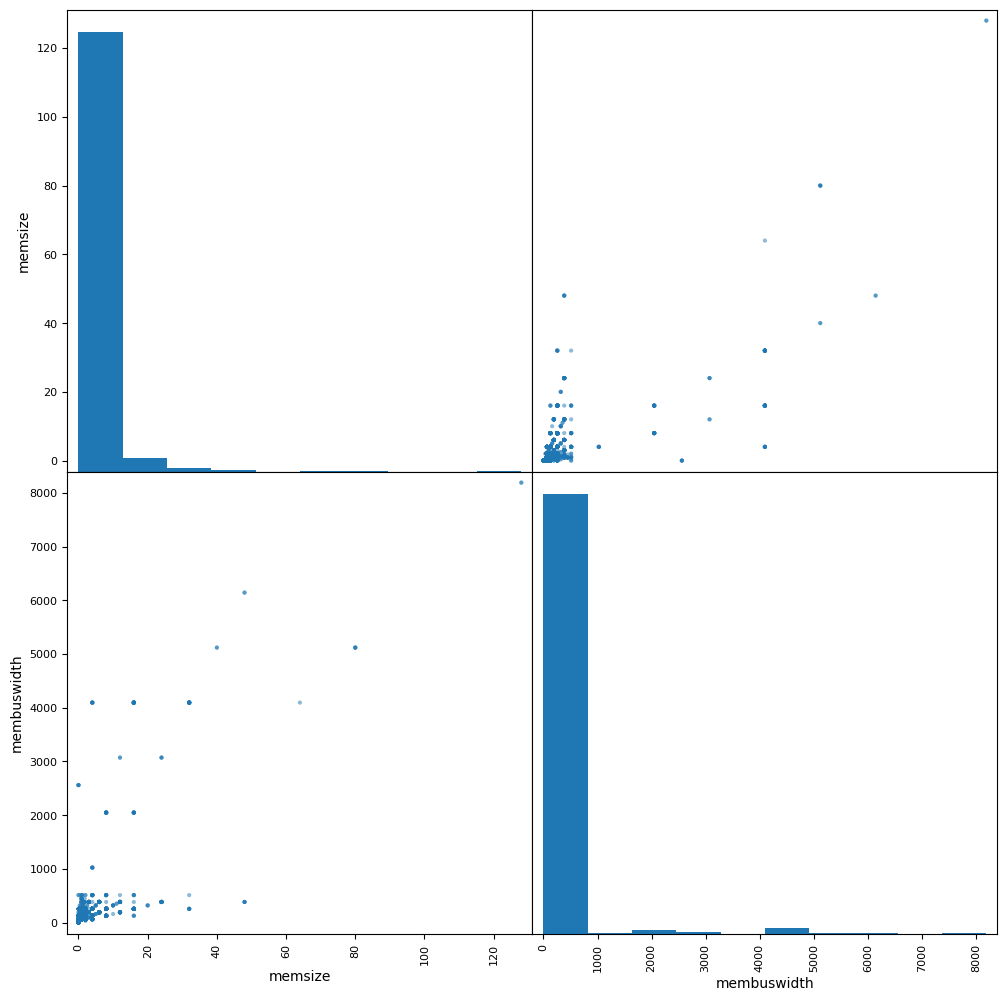

In [45]:
pd.plotting.scatter_matrix(df[['memsize','membuswidth']],figsize=(12,12))

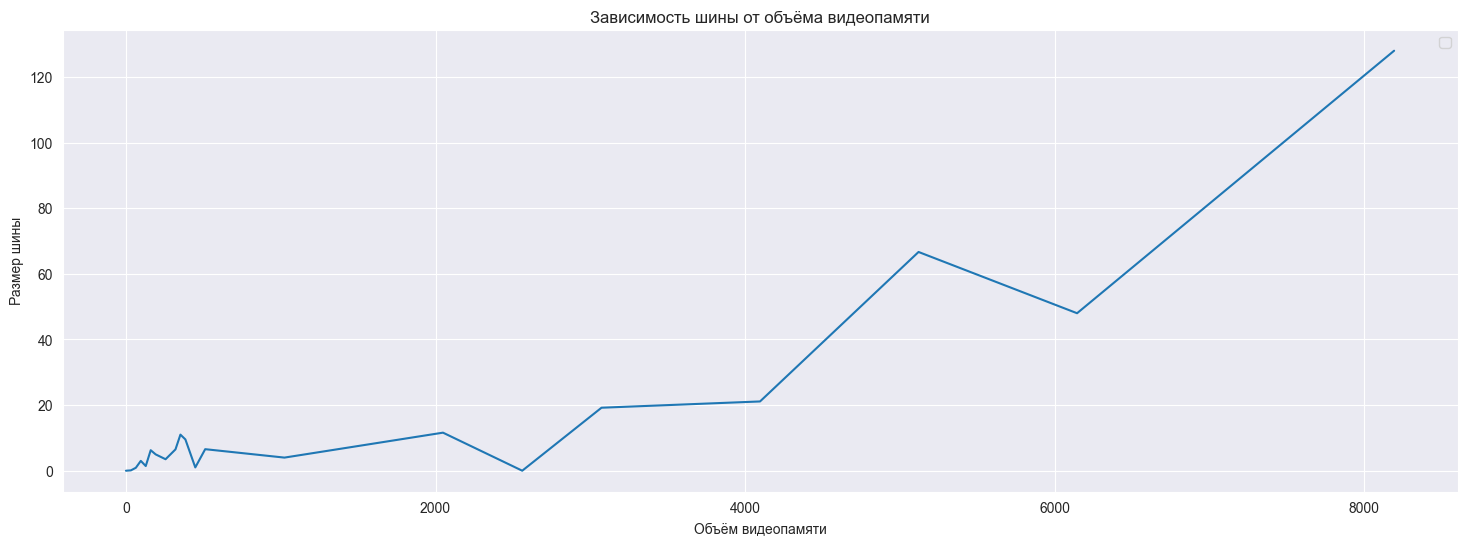

In [47]:
mean_foul = df.pivot_table(index='membuswidth',
                            values='memsize',
                            aggfunc='mean').sort_values(by='membuswidth')
plt.figure(figsize=(18,6))
sns.lineplot(data=mean_foul)
sns.set_style('darkgrid')
plt.title('Зависимость шины от объёма видеопамяти')
plt.xlabel('Объём видеопамяти')
plt.ylabel('Размер шины')
plt.legend('')

<AxesSubplot: >

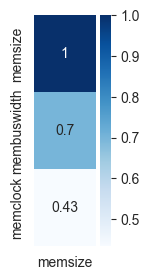

In [51]:
df_filter = df[['memsize','membuswidth','memclock']]
plt.figure(figsize=(1,3))
sns.heatmap(df_filter.corr()[['memsize']].sort_values(by='memsize', 
                                                            ascending=False),cmap='Blues',annot=True)